In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#parsing nfl data from the last 5 years to predict touchdowns based on passing yards
#Uses previous 5 years of historic data from nfl.com using pandas web-scraper to create a linear regression model using scikit-learn


In [4]:
listy = [2021, 2020, 2019, 2018, 2017, 2016]
df = []
for i in range(0, len(listy)):
    url = "https://www.nfl.com/stats/player-stats/category/passing/%s/post/all/passingyards/desc" % listy[i]
    r = requests.get(url)
    dflist = pd.read_html(r.text) 
    df.append(dflist[0])
    # this parses all the tables in webpages to a list



df = np.array(df)

df = df.reshape(150, 16)
#use numpy to shape array into 2D array

df = pd.DataFrame(df)

listi = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df = df[listi]
column_names = ['Player','Pass_Yds','Yds/Att','Att','Cmp','Cmp %', 'TD','INT', 'Rating']
df.columns = column_names
#rename column names

df
df.insert(1, 'year', 0)
pd.set_option('display.max_columns', 500)

m=0
y = 2021

for i in range(0, len(df['year'])):
    df.iloc[i, 1] = y
    m +=1
    
    if m == 25:
        y += -1
        m = 0
        #append year for each data point

        

        
        
            
        
       
    
    
    
        
   

    



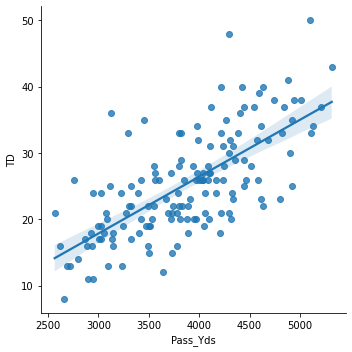

In [67]:
df['Pass_Yds'] = df['Pass_Yds'].astype('float32')
df['TD'] = df['TD'].astype('float32')

sns.lmplot(x='Pass_Yds', y='TD', data=df) 

#change to float for seaborn & check for linear relationship between passing yards and touchdowns


In [90]:
X = df['Pass_Yds'].values.reshape(-1, 1)
y = df['TD'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("The r^2 for this model is ", regr.score(X_test, y_test))


The r^2 for this model is  0.34514575871036246


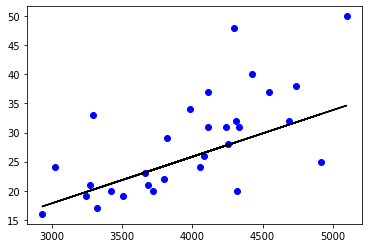

In [91]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [114]:
print("To estimate Pass-Yds based on Touchdowns use this equation ", "y=", regr.intercept_, "+", regr.coef_,"x")

print("Input a passing yard number to estimate predicted touchdowns")
i = input()
i =int(i)

r = (i * float(regr.coef_)) + float(regr.intercept_)
print(r)

#allow user to estimate touchdowns besides on desired passing yards

To estimate Pass-Yds based on Touchdowns use this equation  y= [-6.278927] + [[0.00802838]] x
Input a passing yard number to estimate predicted touchdowns
5200
35.46865697205067
